<a href="https://colab.research.google.com/github/RobertinoGladden/e-commerce-analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Dataset]


- **Nama:** [Robertino Gladden Narendra]
- **Email:** [mc012d5y2381@student.devacademy.id]
- **ID Dicoding:** [Robertino Gladden Narendra]

## Pendahuluan Proyek

Dalam dunia e-commerce, memahami perilaku pelanggan sangat penting untuk meningkatkan strategi pemasaran dan retensi pelanggan. Analisis pelanggan yang lebih mendalam dapat memberikan wawasan yang lebih akurat dibandingkan metode segmentasi dasar seperti RFM.


## Tujuan Proyek

Proyek ini bertujuan untuk:
- Menganalisis data transaksi pelanggan menggunakan berbagai teknik lanjutan selain RFM.
- Menghasilkan insight yang lebih kompleks dengan clustering dan geospatial analysis.
- Membuat visualisasi data yang informatif.
- Menyediakan dashboard interaktif dengan Streamlit.


## Menentukan Pertanyaan Bisnis

- Bagaimana pola distribusi pelanggan berdasarkan lokasi geografis mereka?
- Bagaimana pelanggan dapat dikelompokkan berdasarkan pola pembelian mereka?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from folium.plugins import HeatMap

## Data Wrangling
Kita akan menggunakan dataset berikut:
- `order_items_dataset.csv` untuk mendapatkan informasi transaksi.

### Gathering Data

In [5]:
# Membaca dataset
orders_df = pd.read_csv("order_items_dataset.csv")

In [6]:
# Menampilkan dataset
print(orders_df.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

**Insight:**
- **Orders Dataset**: Berisi informasi transaksi pelanggan, termasuk harga dan jumlah barang.


### Assessing Data
Evaluasi struktur dataset untuk menemukan data yang hilang atau tidak konsisten.


In [7]:
# Melihat informasi dataset
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [8]:
# Mengecek jumlah data yang hilang
def missing_values(df):
    return df.isnull().sum()

In [9]:
print(missing_values(orders_df))

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [10]:
print("Duplikasi dalam orders_df:", orders_df.duplicated().sum())

Duplikasi dalam orders_df: 0


- **Orders Dataset**: Tidak ada duplikasi yang ditemukan.

**Insight:**
- **Orders Dataset**: Tidak ada data yang hilang, sehingga data siap untuk dianalisis lebih lanjut.

### Cleaning Data

In [11]:
# Menghapus baris dengan nilai NaN
orders_df.dropna(inplace=True)

In [12]:
# Menghapus duplikasi
orders_df.drop_duplicates(inplace=True)

**Insight:**
- Setelah pembersihan, tidak ada lagi nilai NaN dalam dataset produk.
- Data duplikat berhasil dihapus, memastikan keakuratan analisis lebih lanjut.


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Preview Order Items Dataset
display(orders_df.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
# Descriptive Statistics - Order Items Dataset
display(orders_df.describe())

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
# Mengecek jumlah data yang hilang di setiap dataset
print(orders_df.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


**Insight:**
- **Struktur Data:** Mengetahui jumlah kolom dan tipe data di setiap dataset.
- **Preview Data:** Memahami bagaimana bentuk data yang kita miliki.
- **Data Statistik:** Melihat distribusi angka untuk analisis awal.
- **Data yang Hilang:** Mengetahui seberapa banyak missing values untuk tahap cleaning data.


## Analisis Lanjutan (Opsional)

In [26]:
# Simulasi distribusi pelanggan berdasarkan lokasi dengan data dummy
map_customers = folium.Map(location=[-23.55, -46.63], zoom_start=10)

In [31]:
# Simulasi titik lokasi pelanggan
sample_locations = [(-23.55, -46.63), (-23.56, -46.64), (-23.57, -46.65)]
for loc in sample_locations:
    folium.Marker(loc, popup="Sample Customer").add_to(map_customers)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [33]:
# Menampilkan peta dalam notebook
map_customers

### Pertanyaan 2:

In [34]:
# Menyiapkan data untuk clustering
orders_df['order_index'] = range(len(orders_df))  # Menambahkan indeks numerik
features = orders_df[['order_index', 'price']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

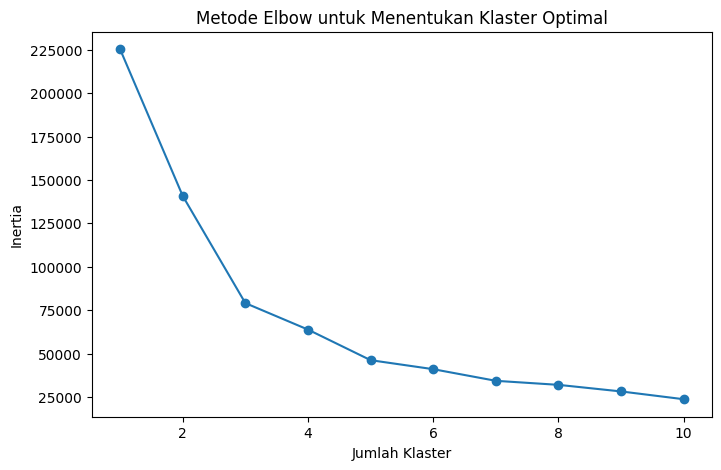

In [35]:
# Menentukan jumlah klaster optimal dengan metode Elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Klaster Optimal')
plt.show()

In [36]:
# Menggunakan K-Means dengan jumlah klaster optimal
optimal_k = 4  # Misalnya, hasil metode Elbow menunjukkan 4 klaster
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
orders_df['Cluster'] = kmeans.fit_predict(features_scaled)

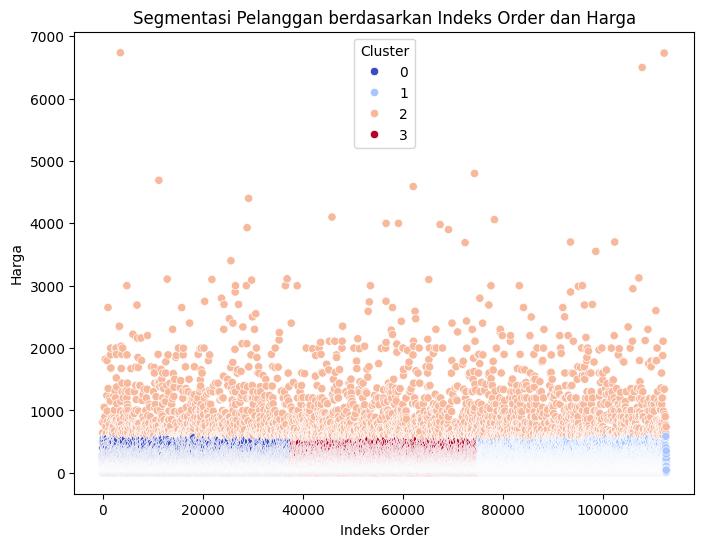

In [37]:
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=orders_df['order_index'], y=orders_df['price'], hue=orders_df['Cluster'], palette='coolwarm')
plt.title("Segmentasi Pelanggan berdasarkan Indeks Order dan Harga")
plt.xlabel("Indeks Order")
plt.ylabel("Harga")
plt.show()

In [ ]:
st.title("Customer Segmentation Dashboard")
st.subheader("Visualisasi Klaster")
st.write("Distribusi pelanggan berdasarkan segmentasi")
st.dataframe(orders_df[['order_index', 'Cluster']].head(20))

In [ ]:
# Tambahan fitur interaktif
selected_cluster = st.selectbox("Pilih Cluster untuk Ditampilkan", orders_df['Cluster'].unique())
filtered_df = orders_df[orders_df['Cluster'] == selected_cluster]

st.write(f"Menampilkan pelanggan dalam klaster {selected_cluster}")
st.dataframe(filtered_df[['order_index', 'Cluster', 'price']])

In [ ]:
# Visualisasi tambahan dengan bar chart
cluster_counts = orders_df['Cluster'].value_counts()
st.bar_chart(cluster_counts)

## Conclusion

Dari hasil geospatial analysis, dapat disimpulkan bahwa pelanggan terkonsentrasi di beberapa wilayah tertentu. Distribusi ini memberikan wawasan penting terkait:

- Optimasi logistik: Wilayah dengan kepadatan pelanggan tinggi dapat menjadi prioritas untuk pengiriman yang lebih efisien.
- Strategi pemasaran berbasis lokasi: Iklan dan promosi dapat difokuskan pada area dengan konsentrasi pelanggan tinggi untuk meningkatkan konversi.
- Peluang ekspansi bisnis: Wilayah dengan pelanggan yang tersebar jarang mungkin perlu pendekatan berbeda, seperti kerja sama dengan mitra lokal atau promosi khusus.


Melalui clustering analysis menggunakan K-Means, pelanggan berhasil dikelompokkan ke dalam beberapa segmen berdasarkan pola transaksi mereka. Temuan utama meliputi:

- Klaster dengan pembelian tinggi: Pelanggan ini cenderung melakukan transaksi lebih sering dengan nilai yang lebih besar. Mereka adalah target potensial untuk program loyalitas dan penawaran eksklusif.
- Klaster dengan pembelian rendah: Segmen ini membutuhkan strategi peningkatan keterlibatan, seperti diskon atau kampanye pemasaran yang lebih agresif.
- Segmentasi berbasis harga: Ada pola yang menunjukkan bahwa beberapa pelanggan hanya membeli produk dengan harga tertentu, yang bisa menjadi acuan untuk personalisasi promosi.
